# Project-Superstore Sales

**Data Exploration & Cleaning**

In [3]:
# Import Libraries
import numpy as np
import pandas as pd

In [4]:
df = pd.read_csv(r"C:\Users\Dell\OneDrive\Desktop\data_for_use\raw_data\Sample - Superstore - Copy.csv", encoding = "unicode_escape")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [5]:
df.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [6]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


**Because it is a csv file so be can not take risk with commas in any column**

In [8]:
# Replace all occurrences of commas within the strings
df['Product Name'] = df['Product Name'].str.replace(',','')

In [9]:
# new column
df['unit_price'] = df['Sales']/df['Quantity']

In [10]:
# new column
df['Profit_Margin'] = ((df['Profit']/df['Sales'])*100).round(4)

In [11]:
# new column
df['sales_growth'] = (df['Sales'].pct_change()*100).round(4)

In [12]:
# check for remaining Null values
df.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
unit_price       0
Profit_Margin    0
sales_growth     1
dtype: int64

In [13]:
# Fill any missing values in the 'sales_growth' column with 0
df['sales_growth'].fillna(0, inplace=True)

C:\Users\Dell\AppData\Local\Temp\ipykernel_8092\1028261937.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['sales_growth'].fillna(0, inplace=True)


In [14]:
new_filename = "Cleaned_Superstore.csv"
df.to_csv(new_filename,  index=False)
print(f'DataFrame saved to a new file called: {new_filename}')

DataFrame saved to a new file called: Cleaned_Superstore.csv


## EDA(Exploratory Data Analysis)

In [16]:
# Import Libraries
import matplotlib.pyplot as plt
import seaborn as sns

**Top-selling products.**

C:\Users\Dell\AppData\Local\Temp\ipykernel_8092\2634770917.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar = sns.barplot(x='Sub-Category', y='Sales', data=pdct, palette='RdPu')


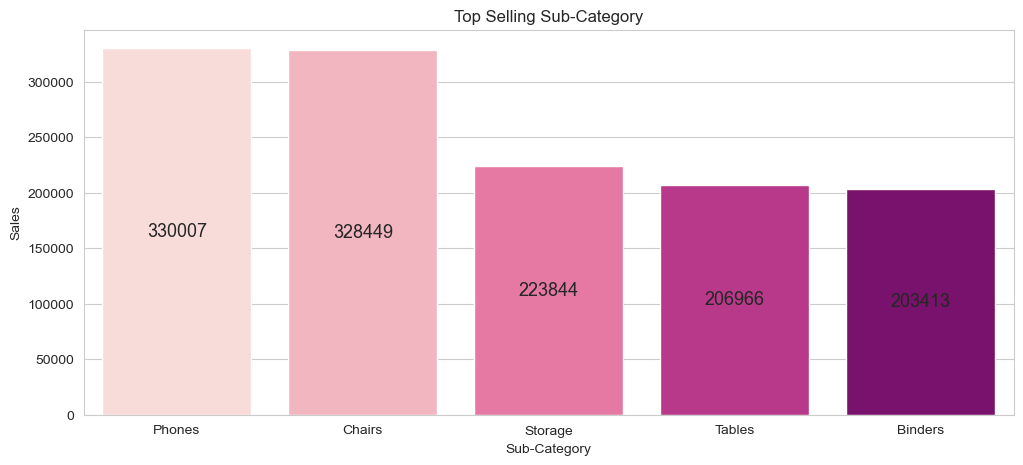

In [55]:
# Set figure size.
plt.figure(figsize=(12, 5))
# Calculate top selling Sub-Category by total sales.
pdct = pd.DataFrame(df.groupby(['Sub-Category'])['Sales'].sum().sort_values(ascending=False).head())
# Create a bar plot of top selling Sub-Category
bar = sns.barplot(x='Sub-Category', y='Sales', data=pdct, palette='RdPu')
plt.title('Top Selling Sub-Category')
# Add Bar_labels
for bars in bar.containers: 
    bar.bar_label(bars, label_type='center', fontsize=13)
# Display the plot.
plt.show()

**least-performing ones**

C:\Users\Dell\AppData\Local\Temp\ipykernel_8092\2462899622.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar = sns.barplot(x='Sub-Category', y='Sales', data=pdct1, palette='PuRd')


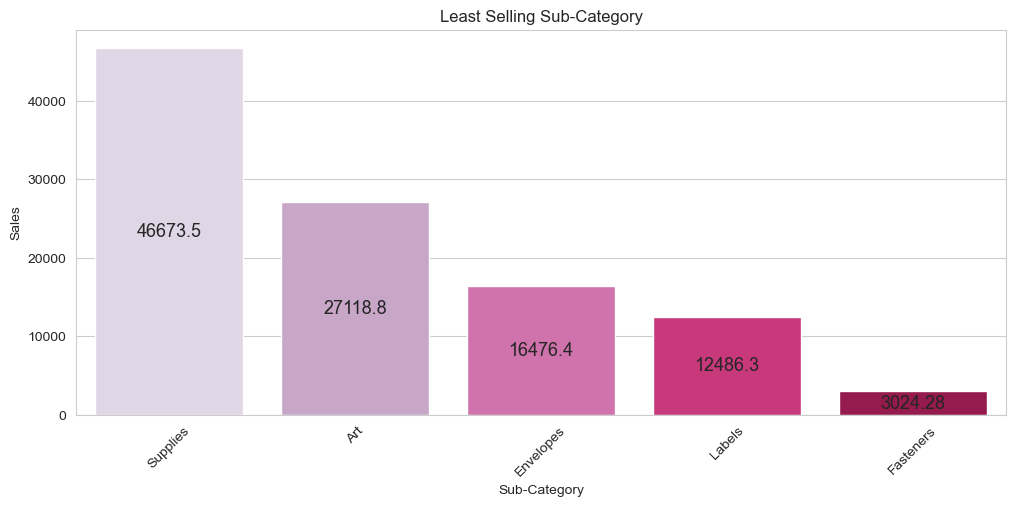

In [53]:
# Set figure size.
plt.figure(figsize=(12, 5))
# Calculate least selling Sub-Category by total sales.
pdct1 = pd.DataFrame(df.groupby(['Sub-Category'])['Sales'].sum().sort_values(ascending=False).tail())
# Create a bar plot
bar = sns.barplot(x='Sub-Category', y='Sales', data=pdct1, palette='PuRd')
plt.title('Least Selling Sub-Category')
plt.xticks(rotation=45)
# Add Bar labels
for bars in bar.containers: 
    bar.bar_label(bars, label_type='center', fontsize=13)
# Display the plot.
plt.show()

**Region-wise sales distribution.**

C:\Users\Dell\AppData\Local\Temp\ipykernel_8092\1412811168.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar = sns.barplot(x='Region', y='Sales', data=rgn, palette='BuPu')


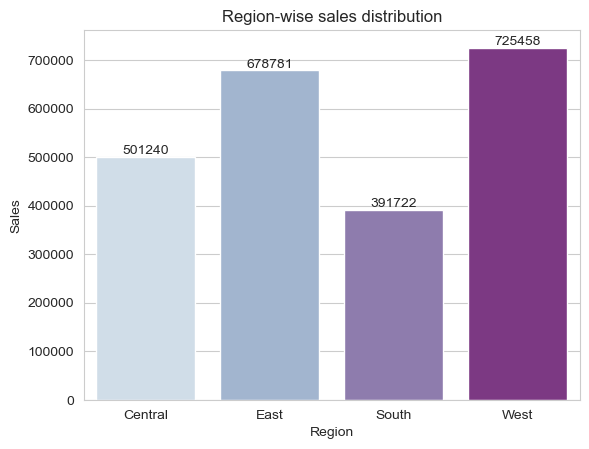

In [57]:
# Set plot style.
sns.set_style("whitegrid")
# Calculate total sales per region.
rgn = pd.DataFrame(df.groupby(['Region'])['Sales'].sum())
# Create a bar plot of sales by region with a blue-purple palette.
bar = sns.barplot(x='Region', y='Sales', data=rgn, palette='BuPu')
# Set the plot title.
plt.title('Region-wise sales distribution')
# Add gray-colored labels to each bar showing the sales value.
for bars in bar.containers:
    bar.bar_label(bars)
# Display the plot.
plt.show()

## Customer segmentation

***Using K-Means Clustering to group similar customers together.***

In [26]:
# Total sales per customer
customer_Sales = df.groupby('Customer ID')['Sales'].sum().reset_index()
# Number of orders per customer
customer_Orders = df.groupby('Customer ID')['Order ID'].nunique().reset_index()
# Merge the data
customer_Data = customer_Sales.merge(customer_Orders, on = 'Customer ID')
# Rename columns
customer_Data.columns = ['Customer ID', 'Total Sales', 'Total Orders']
# Calculate Average Order Value
customer_Data['Avg Order Value'] = customer_Data['Total Sales']/customer_Data['Total Orders']

In [27]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
# Select features for clustering
features = customer_Data[['Total Sales', 'Total Orders', 'Avg Order Value']]
# Standardize data (important for K-Means)
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)
# Apply K-Means
kmeans = KMeans(n_clusters = 3, random_state = 42)
customer_Data['Segment'] = kmeans.fit_predict(features_scaled)
customer_Data.head()

,Customer ID,Total Sales,Total Orders,Avg Order Value,Segment
0,AA-10315,5563.560,5,1112.712000,0
1,AA-10375,1056.390,9,117.376667,0
2,AA-10480,1790.512,4,447.628000,1
3,AA-10645,5086.935,6,847.822500,0
4,AB-10015,886.156,3,295.385333,1


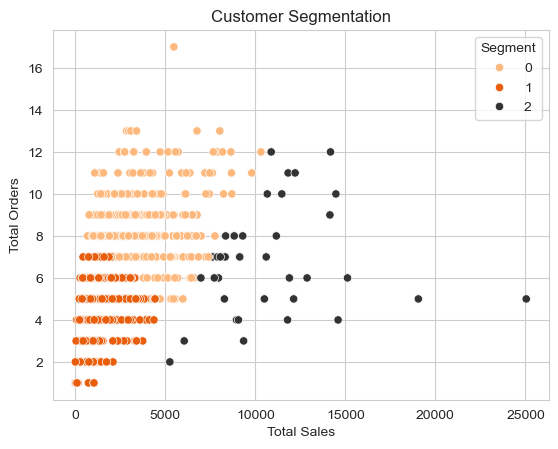

In [59]:
sns.scatterplot(data = customer_Data, x = 'Total Sales', y = 'Total Orders', hue = 'Segment', palette = 'Oranges_d')
plt.title('Customer Segmentation')
plt.show()

***The scatter plot represents the segmentation of customers based on their purchasing behavior, using K-Means clustering with three clusters.***

***Frequent Buyers (Moderate to High Value): Segment 0.***

***Regular Buyers (Lower Value): Segment 1.***

***High-Value Buyers (Less Frequent): Segment 2.***